In [0]:
# !pip install kaggle-cli
# !kg download -u name -p pw -c bike-sharing-demand
# !ls

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


In [0]:
data = pd.read_csv("train.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


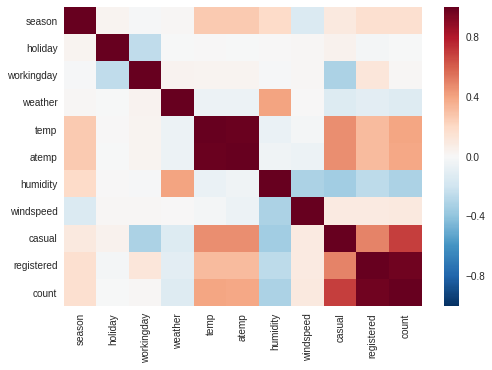

In [0]:
sns.heatmap(data.corr())

In [0]:
data.drop(['casual', 'registered'], axis=1, inplace=True)

In [0]:
def code_date(df):
    df['datetime'] = df.datetime.astype('datetime64[ns]')
    df['year'] = df.datetime.apply(lambda x: x.year)
    df['month'] = df.datetime.apply(lambda x: x.month)
    df['day'] = df.datetime.apply(lambda x: x.day)
    df['hour'] = df.datetime.apply(lambda x: x.hour)

In [0]:
code_date(data)

In [0]:
tree = DecisionTreeRegressor(random_state=17)

In [0]:
X = data.drop(['datetime', 'count'], axis=1)
y = data['count']

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=17)

In [0]:
tree.fit(X_train.values, y_train.values)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=17, splitter='best')

In [0]:
metrics.mean_squared_error(tree.predict(X_valid), y_valid), \
metrics.mean_squared_error(tree.predict(X_train), y_train)

(3264.661278471712, 0.0)

неограничено = переобучено

In [0]:
# !pip install graphviz
# !apt-get install graphviz
# !pip install pydotplus

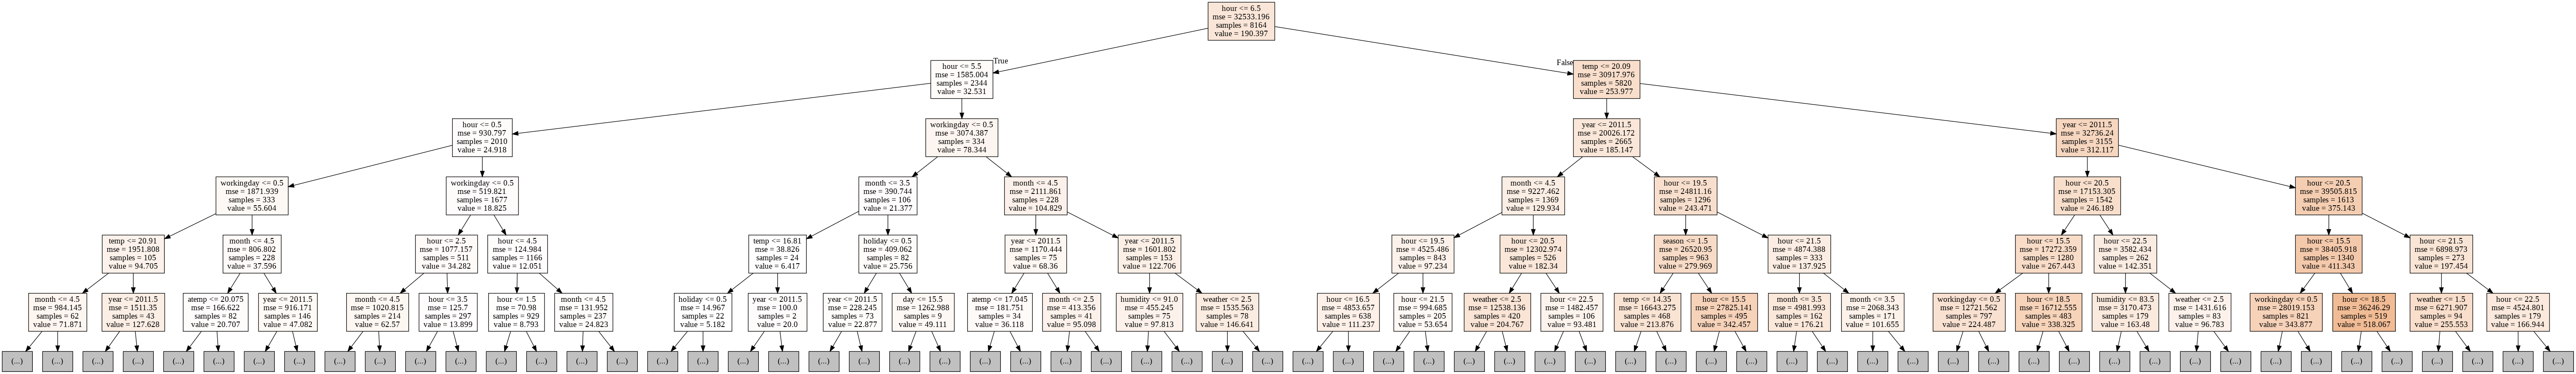

In [0]:
from IPython.display import Image
from graphviz import Source
import pydotplus

dot_data = export_graphviz(tree, out_file=None,  max_depth=5, feature_names=X.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(Source(dot_data).pipe(format='png'))

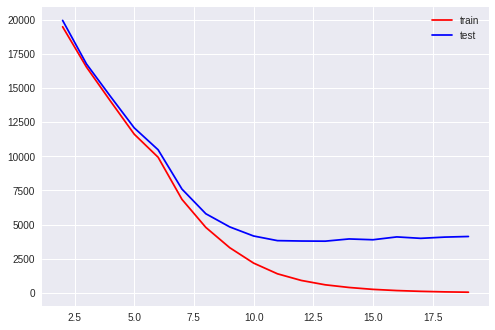

In [0]:
trains = []
tests = []
for i in range(2, 20):
    
    t = DecisionTreeRegressor(random_state=17, max_depth=i)
    cv = cross_validate(t, X_train, y_train, scoring='neg_mean_squared_error', cv=4, return_train_score=True)
    trains.append(np.mean(cv['train_score'])*-1)
    tests.append(np.mean(cv['test_score'])*-1)

plt.plot( range(2, 20), trains, color='red', label='train')
plt.plot( range(2, 20), tests, color='blue', label='test')
plt.legend()
plt.show()
    

линии расходятся - перефитимся

In [0]:
tree = DecisionTreeRegressor(random_state=17, max_depth=8)
tree.fit(X_train, y_train)
metrics.mean_squared_error(tree.predict(X_valid.values), y_valid.values), \
metrics.mean_squared_error(tree.predict(X_train.values), y_train.values)

(5207.150897296297, 4698.757419288142)

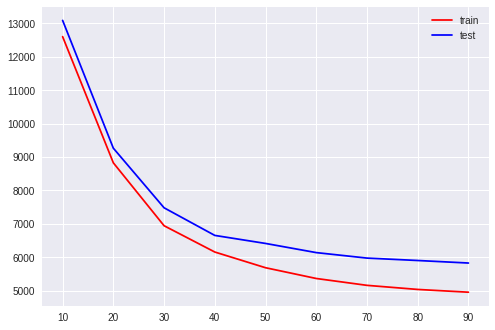

In [0]:
trains = []
tests = []
for i in range(10, 100, 10):
    
    t = DecisionTreeRegressor(random_state=17, max_depth=7, max_leaf_nodes=i)
    cv = cross_validate(t, X_train, y_train, scoring='neg_mean_squared_error', cv=4, return_train_score=True)
    trains.append(np.mean(cv['train_score'])*-1)
    tests.append(np.mean(cv['test_score'])*-1)

plt.plot( range(10, 100, 10), trains, color='red', label='train')
plt.plot( range(10, 100, 10), tests, color='blue', label='test')
plt.legend()
plt.show()
    

In [0]:
tree = DecisionTreeRegressor(random_state=17, max_depth=7, max_leaf_nodes=40)
tree.fit(X_train, y_train)
metrics.mean_squared_error(tree.predict(X_valid.values), y_valid.values), \
metrics.mean_squared_error(tree.predict(X_train.values), y_train.values)

(6084.30306997783, 6071.408998837978)

In [0]:
grid_param = {
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [2, 4, 8],
}

gs = GridSearchCV(DecisionTreeRegressor(random_state=17, max_depth=7, max_leaf_nodes=40), grid_param, scoring='neg_mean_squared_error', cv=4)
gs.fit(X_train.values, y_train.values)
gs.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 2}

In [0]:
metrics.mean_squared_error(gs.best_estimator_.predict(X_valid.values), y_valid.values), \
metrics.mean_squared_error(gs.best_estimator_.predict(X_train.values), y_train.values)

(6084.30306997783, 6071.408998837978)

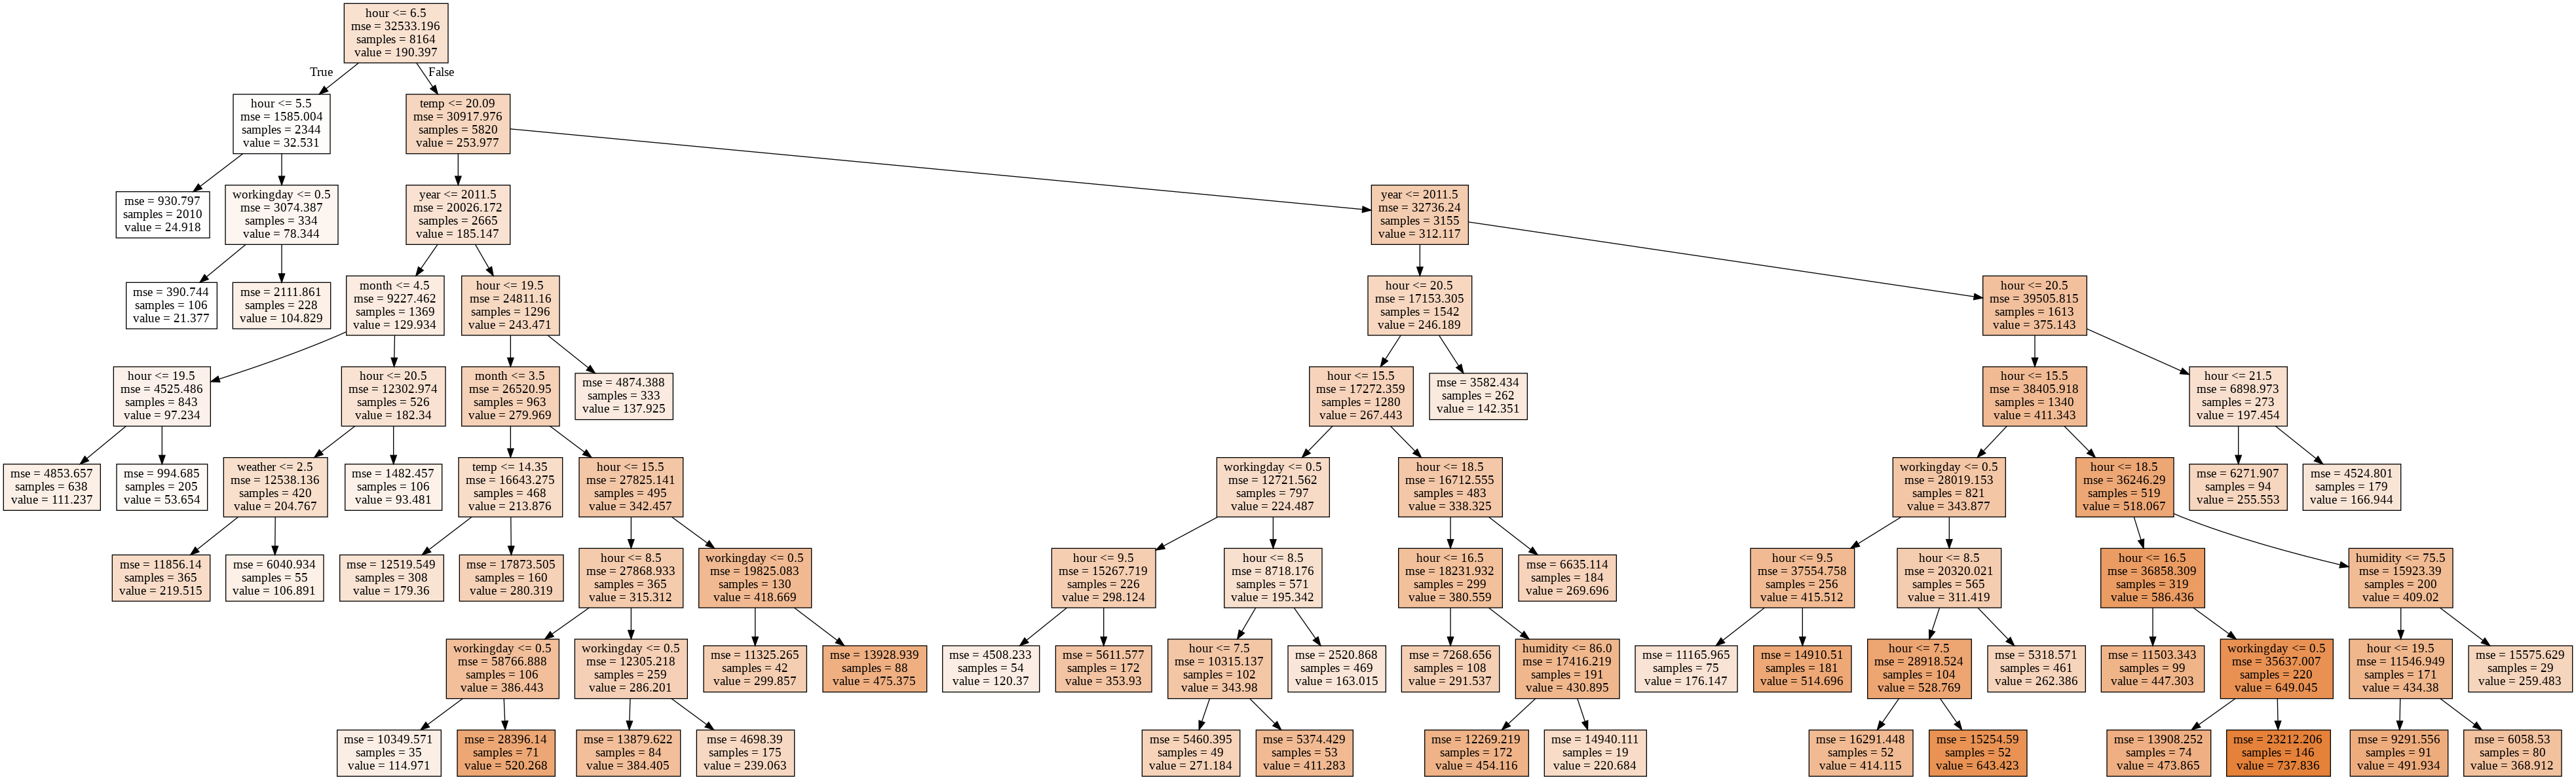

In [0]:
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(Source(dot_data).pipe(format='png'))

In [0]:
tree.feature_importances_

array([0.        , 0.        , 0.0623559 , 0.00280638, 0.11277532,
       0.        , 0.00782648, 0.        , 0.1004085 , 0.02926957,
       0.        , 0.68455785])

In [0]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [0]:
X_new = X[['workingday', 'weather', 'temp', 'humidity', 'year', 'month', 'day', 'hour']]

X_train, X_valid, y_train, y_valid = train_test_split(X_new, y, test_size=.25, random_state=17)
tree.fit(X_train, y_train)
metrics.mean_squared_error(tree.predict(X_valid.values), y_valid.values), \
metrics.mean_squared_error(tree.predict(X_train.values), y_train.values)

(6084.30306997783, 6071.408998837978)

In [0]:
X_new = X[X.columns]

X_new['8h'] = X_new['hour'].apply(lambda x: 1 if x == 8 else 0)
X_new['17h'] = X_new['hour'].apply(lambda x: 1 if x == 17 or x == 18 else 0)
X_new['night'] = X_new['hour'].apply(lambda x: 1 if x <= 6 else 0)
X_new['day'] = X_new['hour'].apply(lambda x: 1 if 9 <= x < 19 or x == 7 else 0)
X_new['eve'] = X_new['hour'].apply(lambda x: 1 if x >= 19 else 0)

X_new['sin_hour'] = np.sin(2*np.pi*X_new['hour']/24)
X_new['cos_hour'] = np.cos(2*np.pi*X_new['hour']/24)
X_new = X_new.drop('hour', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_new, y, test_size=.25, random_state=17)

tree2=  DecisionTreeRegressor(random_state=17, max_depth=8, max_leaf_nodes=60)
tree2.fit(X_train, y_train)

metrics.mean_squared_error(tree2.predict(X_valid.values), y_valid.values), \
metrics.mean_squared_error(tree2.predict(X_train.values), y_train.values)

(4933.69612542236, 4838.114319246011)

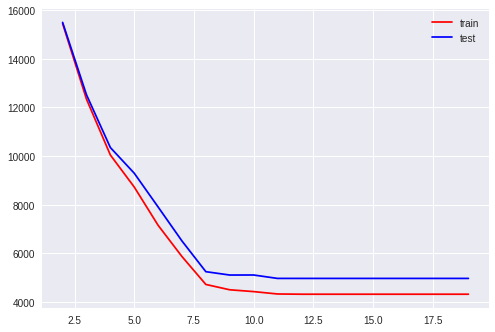

In [0]:
trains = []
tests = []
for i in range(2, 20):
    
    t = DecisionTreeRegressor(random_state=17, max_depth=i, max_leaf_nodes=60)
    cv = cross_validate(t, X_train, y_train, scoring='neg_mean_squared_error', cv=4, return_train_score=True)
    trains.append(np.mean(cv['train_score'])*-1)
    tests.append(np.mean(cv['test_score'])*-1)

plt.plot( range(2, 20), trains, color='red', label='train')
plt.plot( range(2, 20), tests, color='blue', label='test')
plt.legend()
plt.show()
    

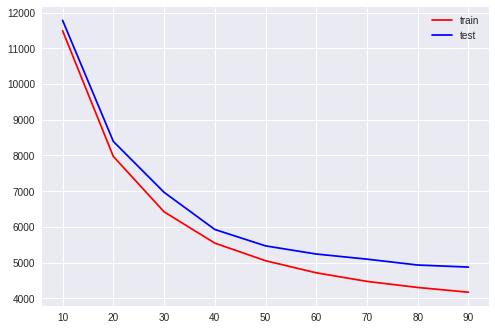

In [0]:
trains = []
tests = []
for i in range(10, 100, 10):
    
    t = DecisionTreeRegressor(random_state=17, max_depth=8, max_leaf_nodes=i)
    cv = cross_validate(t, X_train, y_train, scoring='neg_mean_squared_error', cv=4, return_train_score=True)
    trains.append(np.mean(cv['train_score'])*-1)
    tests.append(np.mean(cv['test_score'])*-1)

plt.plot( range(10, 100, 10), trains, color='red', label='train')
plt.plot( range(10, 100, 10), tests, color='blue', label='test')
plt.legend()
plt.show()
    

In [0]:
tree2.fit(X_new, y)
metrics.mean_squared_error(tree2.predict(X_new), y)

4798.624639022424

In [0]:
# Плохо с большими значениями
# выбросы зло

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3834394390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3834394390>)

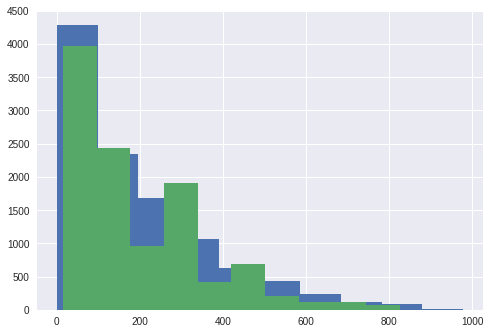

In [0]:
y.hist(), pd.Series(tree2.predict(X_new)).hist()

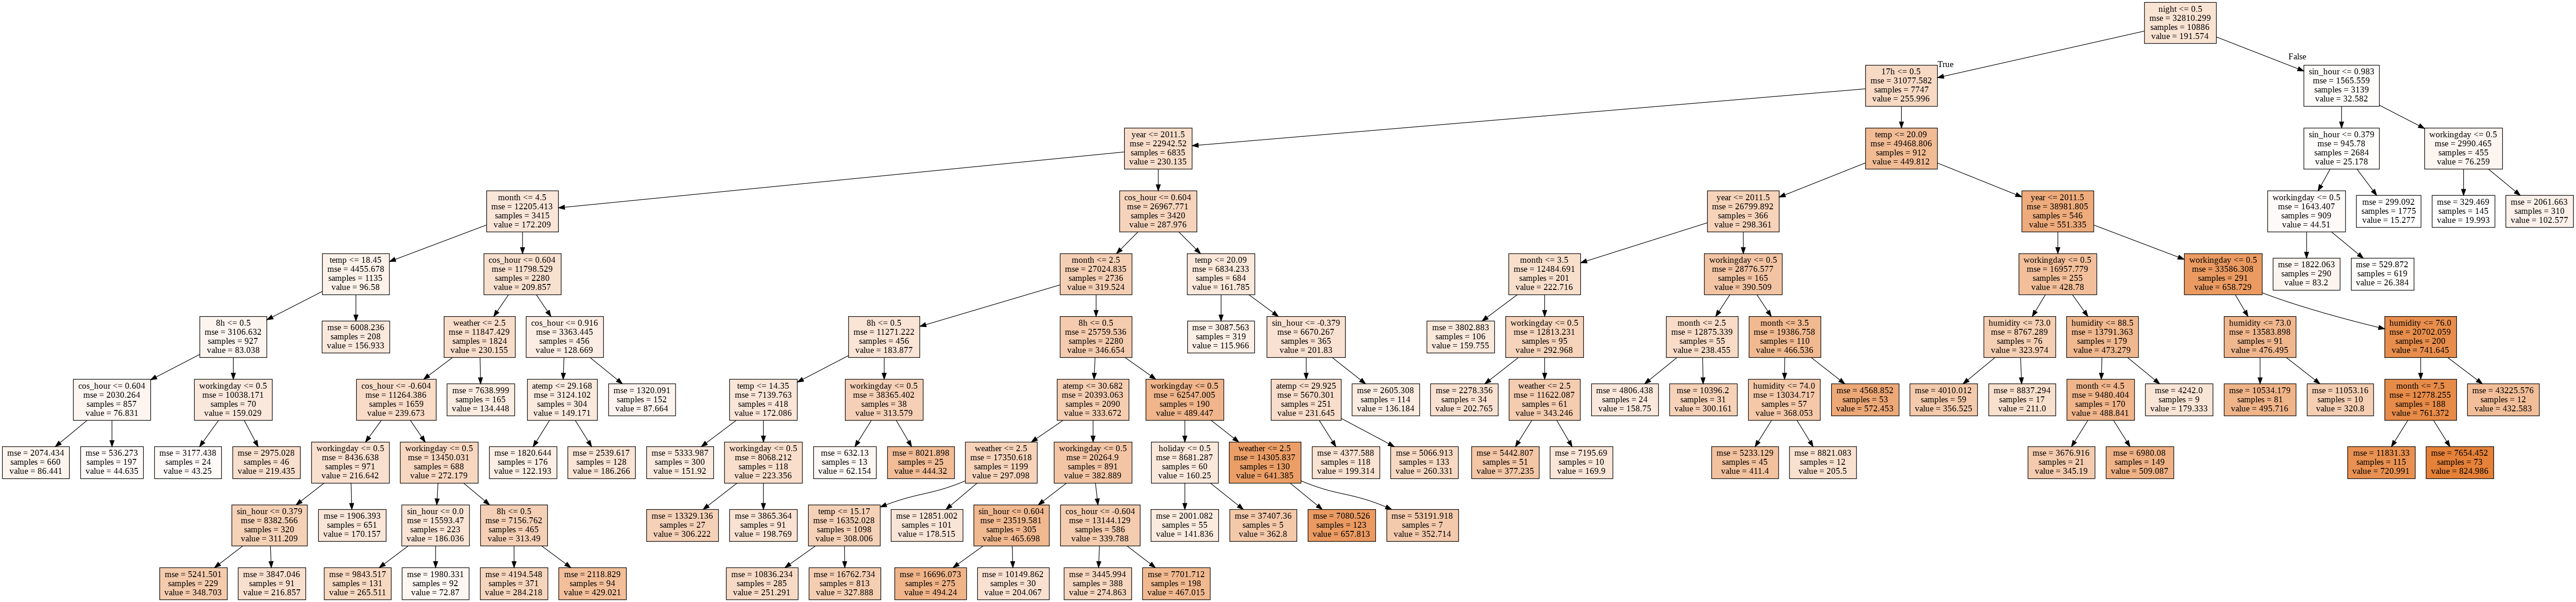

In [0]:
dot_data = export_graphviz(tree2, out_file=None, feature_names=X_new.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(Source(dot_data).pipe(format='png'))

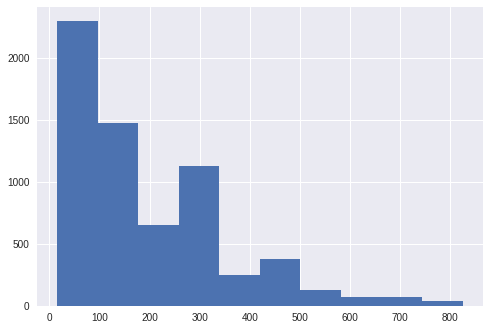

In [0]:
test = pd.read_csv('test.csv')
code_date(test)
X = test.drop('datetime', axis=1)
X_new = X[X.columns]
X_new['8h'] = X_new['hour'].apply(lambda x: 1 if x == 8 else 0)
X_new['17h'] = X_new['hour'].apply(lambda x: 1 if x == 17 or x == 18 else 0)
X_new['night'] = X_new['hour'].apply(lambda x: 1 if x <= 6 else 0)
X_new['day'] = X_new['hour'].apply(lambda x: 1 if 9 <= x < 19 or x == 7 else 0)
X_new['eve'] = X_new['hour'].apply(lambda x: 1 if x >= 19 else 0)

X_new['sin_hour'] = np.sin(2*np.pi*X_new['hour']/24)
X_new['cos_hour'] = np.cos(2*np.pi*X_new['hour']/24)
X_new = X_new.drop('hour', axis=1)

y_pred = tree2.predict(X_new)
res = pd.concat([
    test['datetime'],
    pd.Series(y_pred)
], axis=1)
res.to_csv("subm.csv", index=False)

# from google.colab import files
# files.download("subm.csv")

#0.7 на PL ¯\_(ツ)_/¯

pd.Series(y_pred).hist()